# Redes neuronales

Se utilizó el dataset <b>Fasion MNIST</b> de https://www.kaggle.com/zalando-research/fashionmnist

## Import de librerías

In [1]:
import numpy as np
import pandas as pd
from functools import reduce
from scipy import optimize as op

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
from RedesNeuronales import *
from utilities import *

In [4]:
import time

## Lectura de CSV

In [5]:
print("Lectura de mnist_train")
dataset_train = pd.read_csv('fashion-mnist_train.csv')

print("Lectura de mnist_test")
dataset_test = pd.read_csv('fashion-mnist_test.csv')

Lectura de mnist_train
Lectura de mnist_test


## Estructuración de datos

In [6]:
# Normalizar los datasets de X (train y test)
x_1 = dataset_train.iloc[:, 1:] / 1000.0
m1, n1 = x_1.shape

x_2 = dataset_test.iloc[:, 1:] / 1000.0
m2, n2 = x_2.shape

# Union de ambos datasets
X = np.vstack((
    x_1,
    x_2
))
m, n = X.shape

In [7]:
# Datasets de Y (train y test)
y_1 = np.asarray(dataset_train.iloc[:, 0])
y_1 = y_1.reshape(m1, 1)

y_2 = np.asarray(dataset_test.iloc[:, 0])
y_2 = y_2.reshape(m2, 1)

# Union de ambos datasets
y = np.vstack((
    y_1,
    y_2
))
y = y.reshape(m, 1)

# Vector -> Matriz de categorizacion
Y = (y == np.array(range(10))).astype(int)

In [12]:
# Estructura de la red neuronal
NEURAL_NET = np.array([
    n,
    130,
    10
])

In [13]:
# Se obtienen las shapes de las thetas
theta_shapes = np.hstack((
    NEURAL_NET[1:].reshape(len(NEURAL_NET) - 1, 1),
    (NEURAL_NET[:-1] + 1).reshape(len(NEURAL_NET) - 1, 1)
))

In [14]:
# Matrix -> array de thetas
flat_thetas = flatten_list_of_arrays([
    np.random.rand(*theta_shape)
    for theta_shape in theta_shapes
])

## 1. Desarrollo de red neuronal

Este procedimiento de para optimizar el valor de theta's de transición puede tardar entre 3 y 4 horas.

Se recomienda no no ejecutar esta sección del código a menos que se desee esperar.

In [ ]:
# Optimizacion para encontrar thetas
print("\n---------------- OPTIMIZING ----------------\n")
result = op.minimize(
    fun = cost_function,
    x0 = flat_thetas,
    args = (theta_shapes, X, Y),
    method = 'L-BFGS-B',
    jac = back_propagation,
    options = {'disp': True, 'maxiter': 3000}
)
print("\n---------------- OPTIMIZED ----------------\n")

In [ ]:
# Se guarda el resultado de thetas optimizadas
np.savetxt('thetas_op.txt', result.x)

## 2. Análisis de resultados.

En caso se desee probar con un dataset nuevo, cambiar "dataset_test" por su nuevo dataset.

In [15]:
x_test = dataset_test.iloc[:, 1:] / 1000.0
y_test = np.asarray(dataset_test.iloc[:, 0]).reshape(x_test.shape[0], 1)

In [16]:
# Resultado de thetas optimizadas
flat_thetas_op = readFile("thetas_op.txt")

In [17]:
# Array de thetas -> matriz de thetas
Thetas = inflate_matrixes(flat_thetas_op, theta_shapes)

In [18]:
# Ejecucion de feed forward para obtener prediccion
a = feed_forward(Thetas, x_test)

In [19]:
# Se obtienen los indices del porcentaje mas alto
maximos = np.argmax(a[-1], axis = 1)

In [20]:
success = 0
for i in range(len(a[-1])):
    if (maximos[i] == y_test[i][0]):
        success += 1
        
print("Success: ", success, success * 100/len(a[-1]))

Success:  8825 88.25


Del paso anterior, vemos que se obtiene un accuracy del 88.25% (para este caso en particular).

## Visualizacion de imagenes

In [24]:
x_test = dataset_test.iloc[:, 1:]

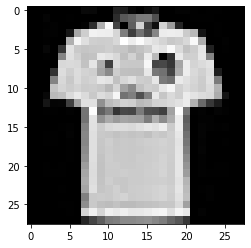

Predicho: T-shirt/top
Real: T-shirt/top
1. Mostrar siguiente imagen
2. Salir.
1


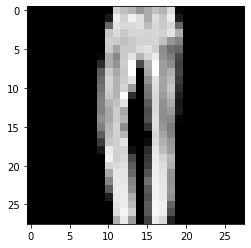

Predicho: Trouser
Real: Trouser
1. Mostrar siguiente imagen
2. Salir.
1


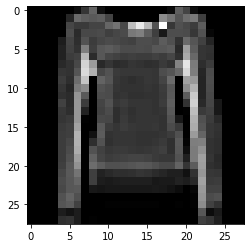

Predicho: Pullover
Real: Pullover
1. Mostrar siguiente imagen
2. Salir.
1


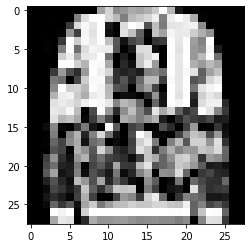

Predicho: Pullover
Real: Pullover
1. Mostrar siguiente imagen
2. Salir.
1


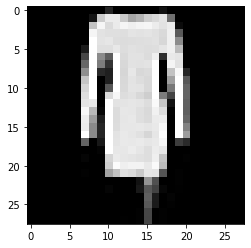

Predicho: Dress
Real: Dress
1. Mostrar siguiente imagen
2. Salir.
1


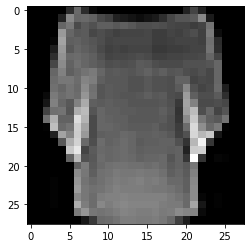

Predicho: Shirt
Real: Pullover
1. Mostrar siguiente imagen
2. Salir.
1


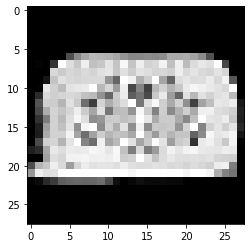

Predicho: Bag
Real: Bag
1. Mostrar siguiente imagen
2. Salir.
1


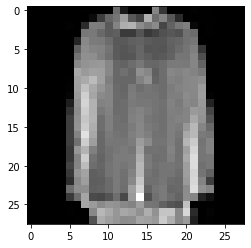

Predicho: Shirt
Real: Shirt
1. Mostrar siguiente imagen
2. Salir.
1


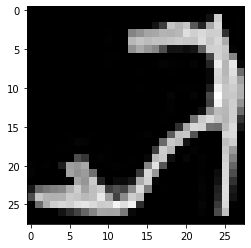

Predicho: Sandal
Real: Sandal
1. Mostrar siguiente imagen
2. Salir.
1


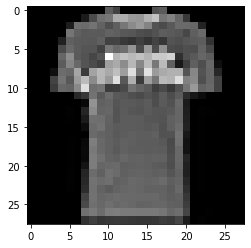

Predicho: T-shirt/top
Real: T-shirt/top
1. Mostrar siguiente imagen
2. Salir.
1


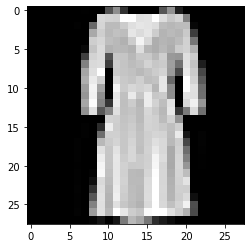

Predicho: Dress
Real: Dress
1. Mostrar siguiente imagen
2. Salir.
1


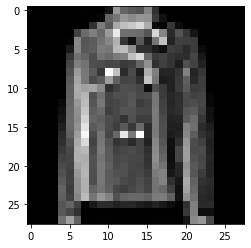

Predicho: Coat
Real: Coat
1. Mostrar siguiente imagen
2. Salir.
1


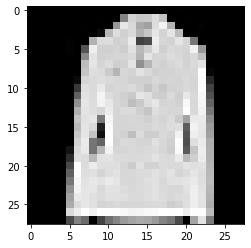

Predicho: Coat
Real: Coat
1. Mostrar siguiente imagen
2. Salir.
1


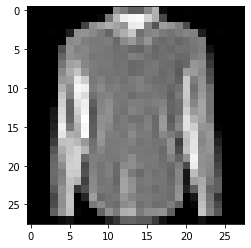

Predicho: Shirt
Real: Shirt
1. Mostrar siguiente imagen
2. Salir.
1


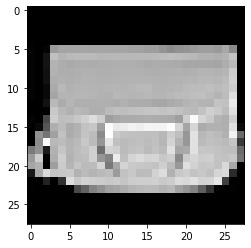

Predicho: Bag
Real: Bag
1. Mostrar siguiente imagen
2. Salir.
1


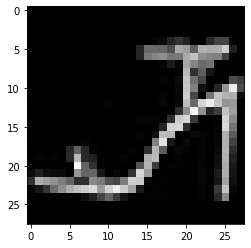

Predicho: Sandal
Real: Sandal
1. Mostrar siguiente imagen
2. Salir.
1


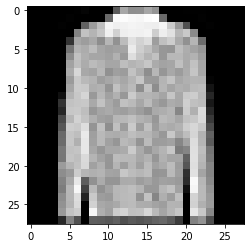

Predicho: Shirt
Real: Shirt
1. Mostrar siguiente imagen
2. Salir.
1


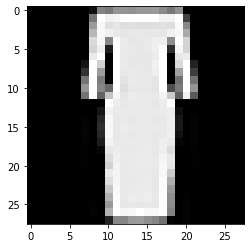

Predicho: Dress
Real: Dress
1. Mostrar siguiente imagen
2. Salir.
1


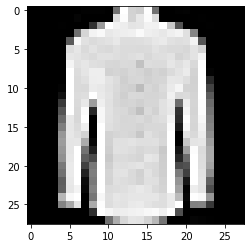

Predicho: Shirt
Real: Shirt
1. Mostrar siguiente imagen
2. Salir.
1


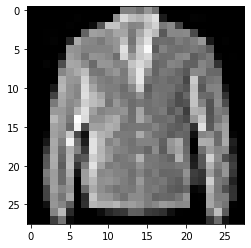

Predicho: Coat
Real: Coat
1. Mostrar siguiente imagen
2. Salir.
1


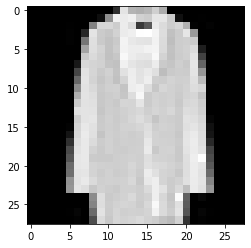

Predicho: Coat
Real: Coat
1. Mostrar siguiente imagen
2. Salir.
1


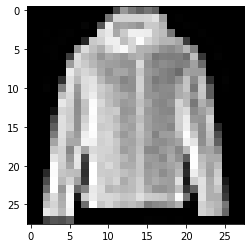

Predicho: Coat
Real: Coat
1. Mostrar siguiente imagen
2. Salir.
1


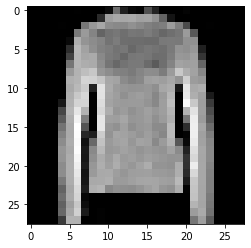

Predicho: Pullover
Real: Pullover
1. Mostrar siguiente imagen
2. Salir.
1


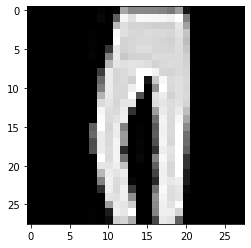

Predicho: Trouser
Real: Trouser
1. Mostrar siguiente imagen
2. Salir.
1


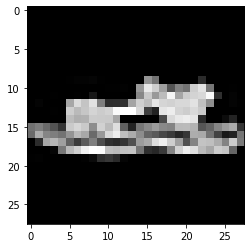

Predicho: Sandal
Real: Sandal
1. Mostrar siguiente imagen
2. Salir.
1


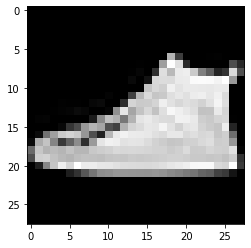

Predicho: Sneaker
Real: Sneaker
1. Mostrar siguiente imagen
2. Salir.
1


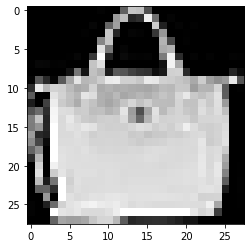

Predicho: Bag
Real: Bag
1. Mostrar siguiente imagen
2. Salir.
1


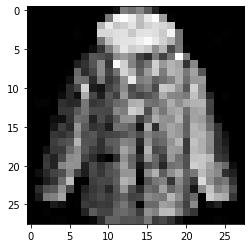

Predicho: Coat
Real: Coat
1. Mostrar siguiente imagen
2. Salir.
1


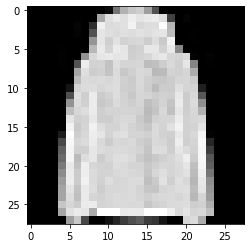

Predicho: Coat
Real: Coat
1. Mostrar siguiente imagen
2. Salir.
1


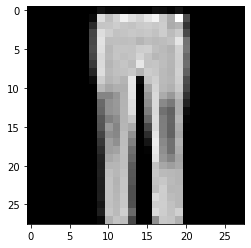

Predicho: Trouser
Real: Trouser
1. Mostrar siguiente imagen
2. Salir.
1


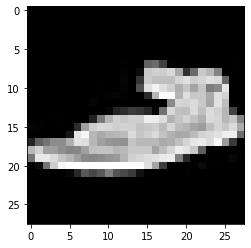

Predicho: Sneaker
Real: Sandal
1. Mostrar siguiente imagen
2. Salir.
1


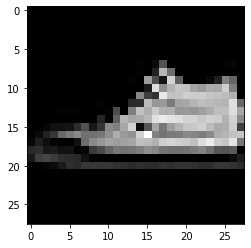

Predicho: Sneaker
Real: Sneaker
1. Mostrar siguiente imagen
2. Salir.
1


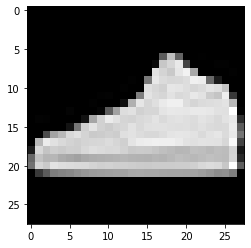

Predicho: Sneaker
Real: Sneaker
1. Mostrar siguiente imagen
2. Salir.
1


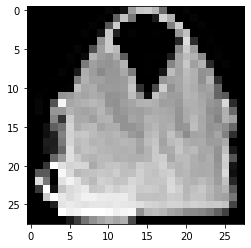

Predicho: Bag
Real: Bag
1. Mostrar siguiente imagen
2. Salir.
1


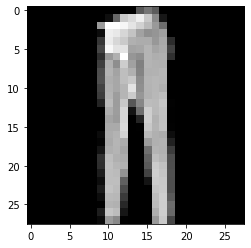

Predicho: Trouser
Real: Trouser
1. Mostrar siguiente imagen
2. Salir.
1


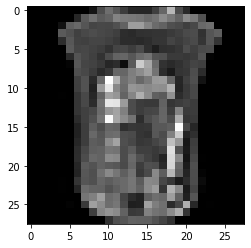

Predicho: T-shirt/top
Real: T-shirt/top
1. Mostrar siguiente imagen
2. Salir.
1


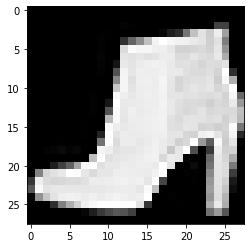

Predicho: Ankle boot
Real: Ankle boot
1. Mostrar siguiente imagen
2. Salir.
1


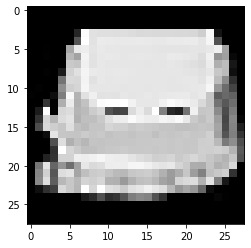

Predicho: Bag
Real: Bag
1. Mostrar siguiente imagen
2. Salir.
1


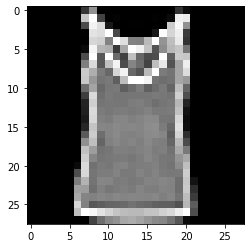

Predicho: T-shirt/top
Real: T-shirt/top
1. Mostrar siguiente imagen
2. Salir.
1


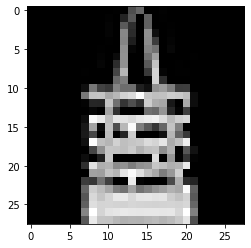

Predicho: Bag
Real: Bag
1. Mostrar siguiente imagen
2. Salir.
1


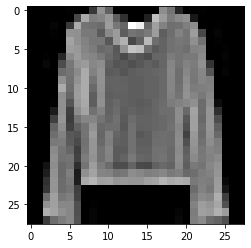

Predicho: Pullover
Real: Pullover
1. Mostrar siguiente imagen
2. Salir.
1


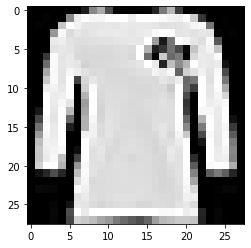

Predicho: T-shirt/top
Real: T-shirt/top
1. Mostrar siguiente imagen
2. Salir.
1


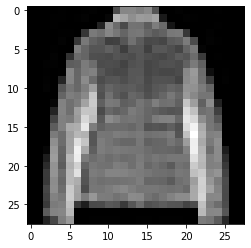

Predicho: Coat
Real: Coat
1. Mostrar siguiente imagen
2. Salir.
1


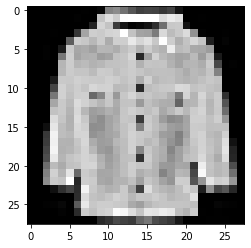

Predicho: Pullover
Real: Shirt
1. Mostrar siguiente imagen
2. Salir.
1


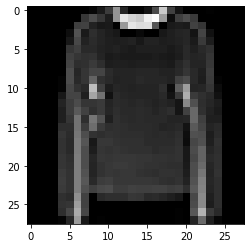

Predicho: Pullover
Real: Pullover
1. Mostrar siguiente imagen
2. Salir.
1


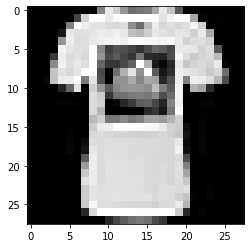

Predicho: T-shirt/top
Real: T-shirt/top
1. Mostrar siguiente imagen
2. Salir.
1


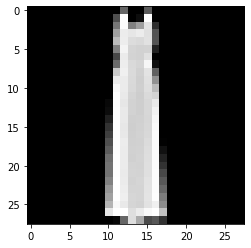

Predicho: Dress
Real: Dress
1. Mostrar siguiente imagen
2. Salir.
1


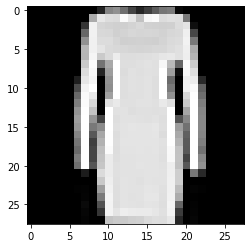

Predicho: Dress
Real: Dress
1. Mostrar siguiente imagen
2. Salir.
1


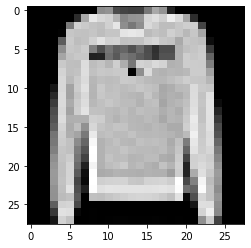

Predicho: Pullover
Real: Pullover
1. Mostrar siguiente imagen
2. Salir.
1


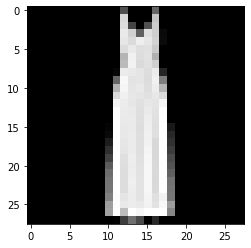

Predicho: Dress
Real: Dress
1. Mostrar siguiente imagen
2. Salir.
1


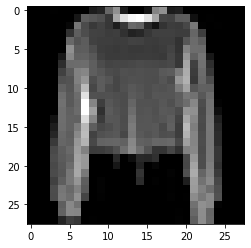

Predicho: Pullover
Real: Pullover
1. Mostrar siguiente imagen
2. Salir.
1


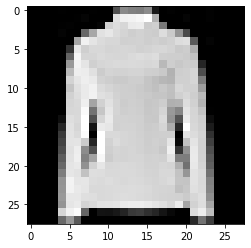

Predicho: Coat
Real: Pullover
1. Mostrar siguiente imagen
2. Salir.
1


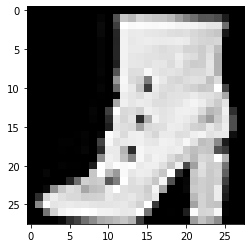

Predicho: Ankle boot
Real: Ankle boot
1. Mostrar siguiente imagen
2. Salir.
2


In [40]:
op = 0
cont = 0
while op != "2" and cont < len(a[-1]):
    pixels = listToMatrix(x_test.values[cont], 28)
    
    # Convert the pixels into an array using numpy
    array = np.array(pixels, dtype=np.uint8)

    # Use PIL to create an image from the new array of pixels
    new_image = Image.fromarray(array)
    new_image.save('test.png')
    
    img = mpimg.imread('test.png')
    imgplot = plt.imshow(img)
    
    plt.show()
    print("Predicho: " + mnist[maximos[cont]])
    print("Real: " + mnist[y_test[cont][0]])
    
    cont += 1
    
    op = input("\n1. Mostrar siguiente imagen\n2. Salir.\n")

En el paso anterior se pueden observar cuantas predicciones se quiera hasta que se presione la opción de salir.

Podemos ver, como se mencionó, se acertó un 88% y que, en los casos que fallan es porque ambas vestimentas se parecen bastante. 
En general, es posible notar que predice bastante bien y no hay overfitting.